In [64]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matploblib inline
import my_globals
from utils import get_sub_featured_datasets

UsageError: Line magic function `%matploblib` not found.


In [27]:
random.seed(4)
np.random.seed(4)

In [41]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings('ignore', category=DataConversionWarning)

## Data

In [20]:
%%time
f1 = pd.read_csv("../project_data/feature_space_1.csv", encoding="latin1")

CPU times: user 1min 18s, sys: 17 s, total: 1min 35s
Wall time: 1min 41s


In [29]:
f1.shape

(100000, 5011)

In [22]:
f1.head()

,exclaim_freq,mention_count,cap_freq,target,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,...,tfidf_àª,tfidf_à¹,tfidf_ðµ,tfidf_ðµð,tfidf_ðµñ,tfidf_ðºð,tfidf_ð½ð,tfidf_ð¾,tfidf_ð¾ð,tfidf_ð¾ñ
0,0.016667,1,0.054054,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1,0.346154,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.023256,2,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.018182,1,0.033333,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,1,0.200000,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model

In [46]:
XX = f1.drop(['target'], axis=1)
yy = f1[['target']]
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=4)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 5010), (20000, 5010), (80000, 1), (20000, 1))

In [59]:
nb = BernoulliNB()

params={'alpha': [10**(n) for n in range(-4, 4)]}

clf = GridSearchCV(nb, params, scoring='accuracy', cv=5, return_train_score=True, verbose=4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..alpha=0.0001;, score=(train=0.786, test=0.760) total time=  26.3s
[CV 2/5] END ..alpha=0.0001;, score=(train=0.785, test=0.763) total time=  25.0s
[CV 3/5] END ..alpha=0.0001;, score=(train=0.787, test=0.759) total time=  25.0s
[CV 4/5] END ..alpha=0.0001;, score=(train=0.788, test=0.756) total time=  24.7s
[CV 5/5] END ..alpha=0.0001;, score=(train=0.785, test=0.760) total time=  25.9s
[CV 1/5] END ...alpha=0.001;, score=(train=0.786, test=0.761) total time=  28.8s
[CV 2/5] END ...alpha=0.001;, score=(train=0.785, test=0.763) total time=  25.1s
[CV 3/5] END ...alpha=0.001;, score=(train=0.787, test=0.759) total time=  26.2s
[CV 4/5] END ...alpha=0.001;, score=(train=0.788, test=0.756) total time=  25.3s
[CV 5/5] END ...alpha=0.001;, score=(train=0.785, test=0.760) total time=  25.9s
[CV 1/5] END ....alpha=0.01;, score=(train=0.786, test=0.761) total time=  25.9s
[CV 2/5] END ....alpha=0.01;, score=(train=0.785,

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=4)

In [60]:
def assess(y_true, y_pred):
    print("confusion matrix:")
    conf_mat = confusion_matrix(y_true, y_pred)
    print(conf_mat)
    print()
    print("accuracy_score:")
    print(accuracy_score(y_true, y_pred))
    print()
    print("classification report:")
    print(classification_report(y_true,y_pred))
    print()
    return conf_mat

Best alpha choice is 1.
Out of sample assessment:

confusion matrix:
[[7464 2467]
 [2280 7789]]

accuracy_score:
0.76265

classification report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9931
           4       0.76      0.77      0.77     10069

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000




<Axes: >

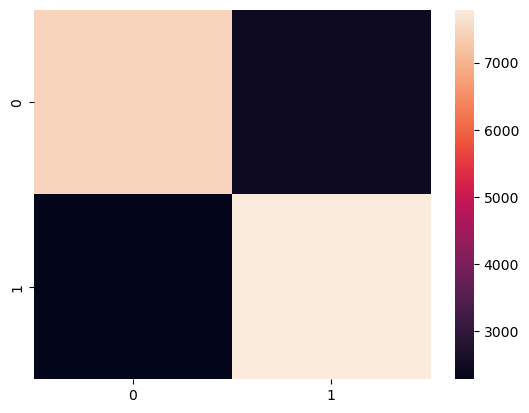

In [65]:
best_alpha = clf.best_params_["alpha"]
print(f"Best alpha choice is {best_alpha}.")
best_nb = clf.best_estimator_

# save model
nb_modelfile = "/".join([my_globals.DATA_DIR, "best_nb.pickle"])
pickle.dump(best_nb, open(nb_modelfile, "wb"))

best_nb.fit(X_train, y_train)
y_pred = best_nb.predict(X_test)

print("Out of sample assessment:")
print()
conf_mat = assess(y_test, y_pred)

sns.heatmap(conf_mat)
